In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
import pickle
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy.stats import multivariate_normal
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

In [4]:
class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):   
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X).reshape(60)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """

        for i in range(len(r)):
            s = np.sum(r[i])*np.sum(self.pi)
            if s == 0:
                print("check r[i]", r[i])
                print("index", i)
                exit(0)
            r[i] = r[i]/s
        return r
    
    def plot(self,r,ax0,iter):
        for i in range(len(r)):
            colors = np.array([r[i][0],r[i][1],r[i][2]])
            ax0.scatter(self.X[i],0,c=colors/255,s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
            ax0.set_title('Iteration '+str(iter))
    
    def run(self):
        likelihoods = []
        fig,ax =  plt.subplots(2,int(self.iterations/2),figsize=(20,10))
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            # """Plot the data"""
            yin = int(iter/2)
            xin = iter%2
            self.plot(r,ax[xin][yin], iter+1)
            
            """M-Step"""

            """calculate m_c"""
            m_c = np.sum(r, axis = 0) 
            
            """calculate pi_c"""
            s = np.sum(m_c)
            self.pi = m_c/s
            
            """calculate mu_c"""
            self.mu = np.sum(self.X*r,axis=0)/m_c


            """calculate var_c"""
            X_3 = np.c_[ self.X, self.X ] 
            X_3 = np.c_[ self.X, X_3 ] 
            a = r*(X_3-self.mu)
            var_c = ((np.dot(a.T,(X_3-self.mu))).diagonal())/m_c

            a = r*(X_3 - self.mu)
            b = np.dot((X_3 - self.mu).T,a)
            cov_c = (1/m_c)*b.diagonal()
            

            l = 0
            for i in range(3):
                l = l + np.sum(self.pi[i]*multivariate_normal.pdf(self.X, mean=self.mu[i], cov=cov_c[i]))
                
            llog = np.log(l)
            likelihoods.append(llog)
            
        plt.show()
        return likelihoods

In [5]:
data = load("./Question-2/dataset1.pkl")

# data = load("./Question-2/dataset3.pkl")

Number of iterations for given gmm  10


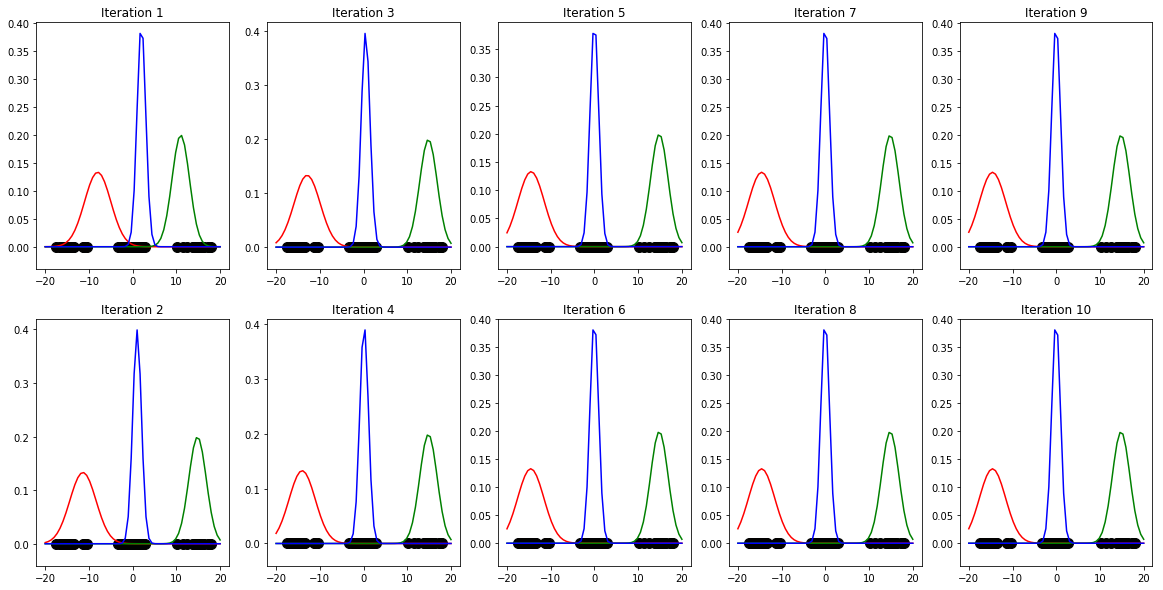

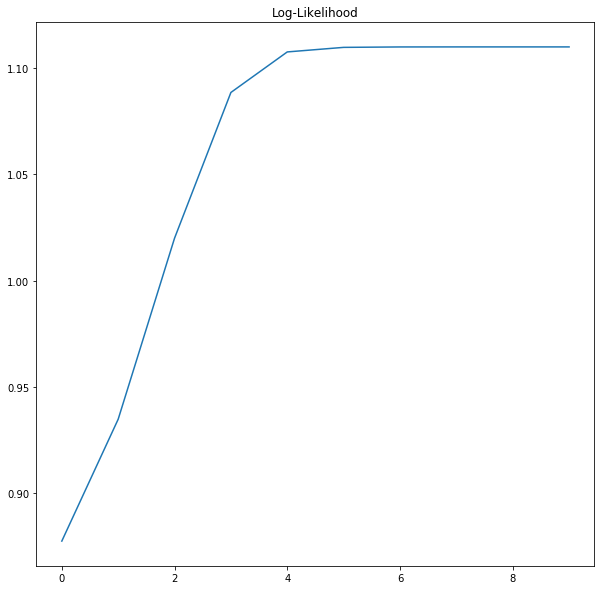

In [6]:
np.random.shuffle(data)
np.random.seed(10)
muR = [-8,11,2]
varR = [3,2,1]
iterations = 10
print("Number of iterations for given gmm ",iterations)
g = GMM1D(data,iterations,muR,[1/3,1/3,1/3],varR)
likelihoods = g.run()

fig2 = plt.figure(figsize=(10,10))
ax1 = fig2.add_subplot(111) 
ax1.set_title('Log-Likelihood')
ax1.plot(range(0,iterations,1),likelihoods)
plt.show()

Data plotted for all 3 iterations. The gaussians are slowing differentiating amongst themselves and are no longer overlapping along on the edges. The log likelihood graph is also plotted.

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(data)
print("Number of iterations for sklearn inbuilt GMM ",gmm.n_iter_)

Number of iterations for sklearn inbuilt GMM  2


As can be seen, the inbuilt GMM reaches convergence far more quickly compared to our GMM.

Now the graphs are plotted for different databases

Number of iterations for given gmm  10


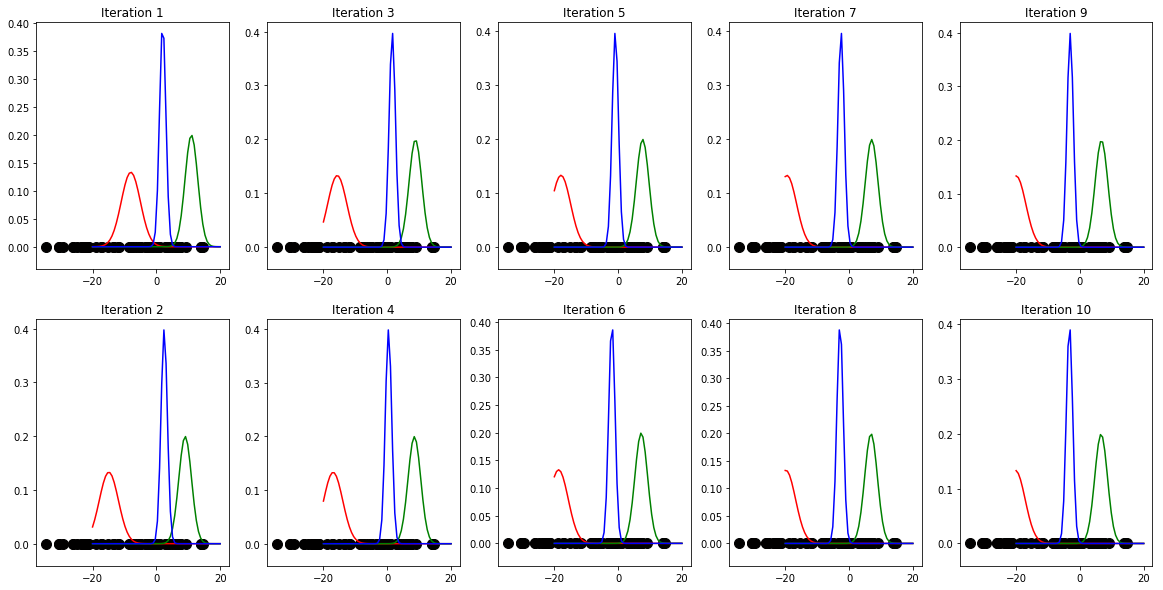

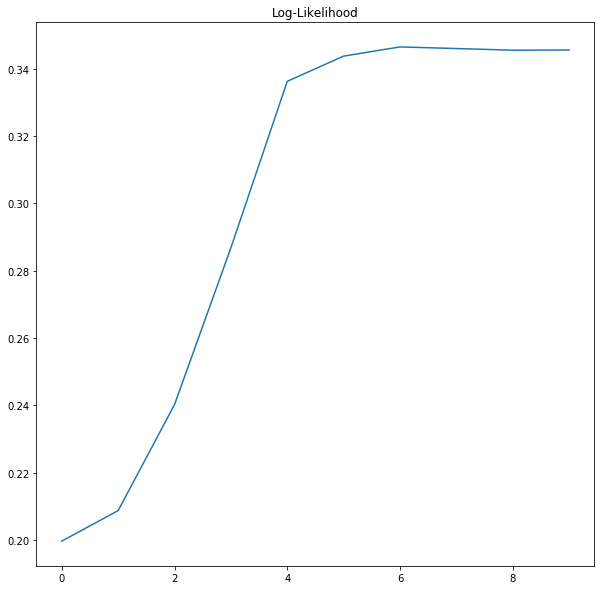

In [8]:
data = load("./Question-2/dataset2.pkl")
np.random.shuffle(data)
np.random.seed(10)
muR = [-8,11,2]
varR = [3,2,1]
iterations = 10
print("Number of iterations for given gmm ",iterations)
g = GMM1D(data,iterations,muR,[1/3,1/3,1/3],varR)
likelihoods = g.run()

fig2 = plt.figure(figsize=(10,10))
ax1 = fig2.add_subplot(111) 
ax1.set_title('Log-Likelihood')
ax1.plot(range(0,iterations,1),likelihoods)
plt.show()

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(data)
print("Number of iterations for sklearn inbuilt GMM ",gmm.n_iter_)

Number of iterations for sklearn inbuilt GMM  5


Number of iterations for given gmm  30


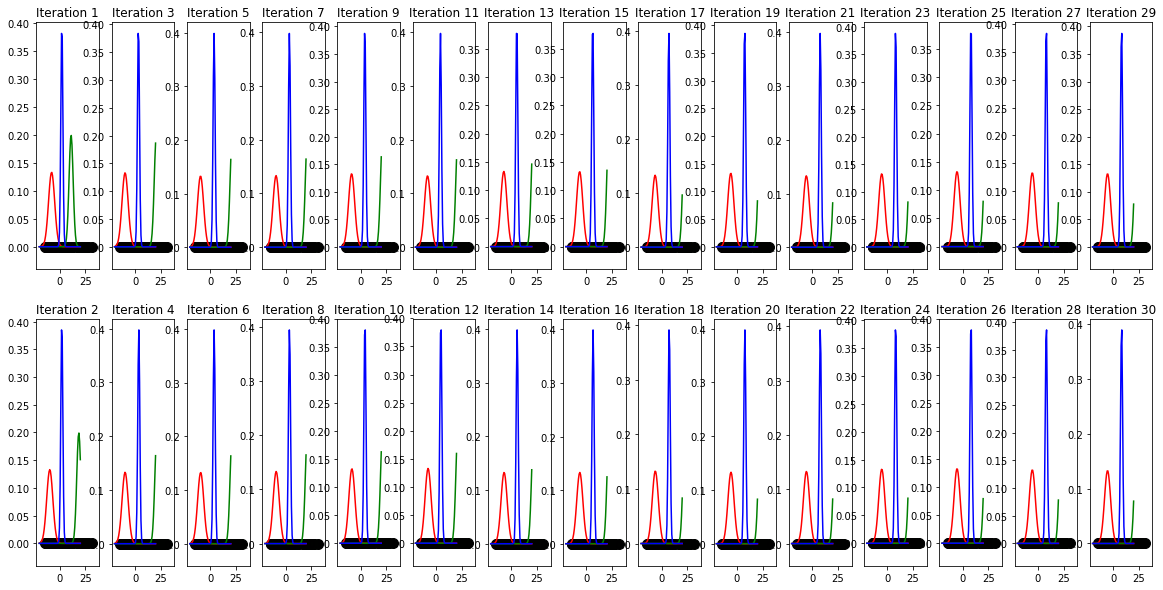

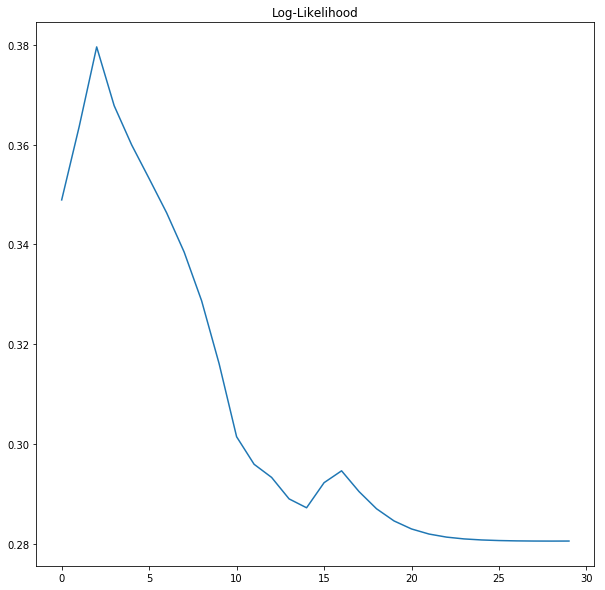

In [13]:
data = load("./Question-2/dataset3.pkl")
np.random.shuffle(data)
np.random.seed(10)
muR = [-8,11,2]
varR = [3,2,1]
iterations = 30
print("Number of iterations for given gmm ",iterations)
g = GMM1D(data,iterations,muR,[1/3,1/3,1/3],varR)
likelihoods = g.run()

fig2 = plt.figure(figsize=(10,10))
ax1 = fig2.add_subplot(111) 
ax1.set_title('Log-Likelihood')
ax1.plot(range(0,iterations,1),likelihoods)
plt.show()

In [14]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(data)
print("Number of iterations for sklearn inbuilt GMM ",gmm.n_iter_)

Number of iterations for sklearn inbuilt GMM  7
